In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


'''The insurance dataset typically contains information about individuals or groups of people and their insurance policies. It often includes various attributes such as age, gender, region, BMI (Body Mass Index), smoking status, number of dependents, insurance charges, etc. The dataset is commonly used for predictive modeling tasks, such as estimating insurance premiums based on individual characteristics.'''

### Importing libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#To split the data into train and test, evaluate the model performance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# set figure size
plt.rcParams['figure.figsize']=[8,5]

#### Reading the csv file

In [9]:
df=pd.read_csv('/kaggle/input/insurance/insurance.csv')

In [10]:
#number of rows and columns in the dataset
df.shape

(1338, 7)

In [11]:
#first five rows of dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
#Finding the missing values in each column of the dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
#statistical summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<Axes: >

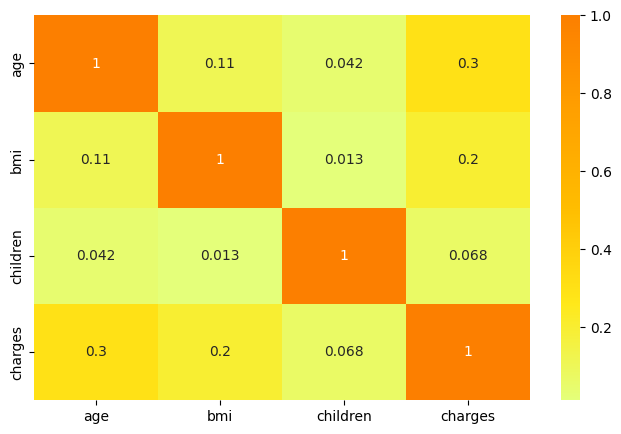

In [14]:
#correlation plot

corr=df.corr(numeric_only=True)
sns.heatmap(corr,cmap='Wistia',annot=True)

### Data Visualization

Text(0.5, 1.0, 'BMI vs Charges')

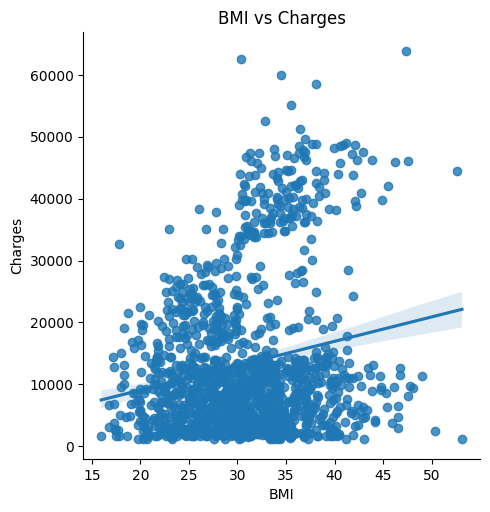

In [15]:
# Visualizing the relationship between BMI and medical charges using Seaborn's lmplot.

sns.lmplot(x='bmi',y='charges',data=df)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='charges', ylabel='Count'>

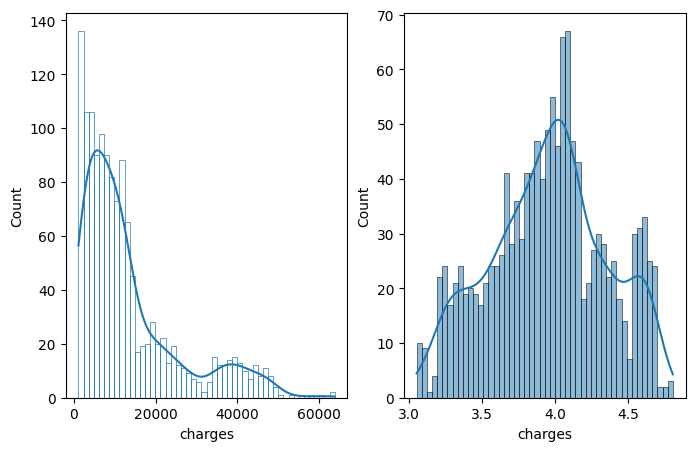

In [16]:
fig,(ax1,ax2)=plt.subplots(ncols=2)
#target  varible
sns.histplot(df['charges'],kde=True,bins=50,fill=False,ax=ax1)
#data is right skewed

#To correct the skewness in the data, we perform log transformation
sns.histplot(np.log10(df['charges']),kde=True,bins=50,ax=ax2)

<Axes: xlabel='smoker', ylabel='charges'>

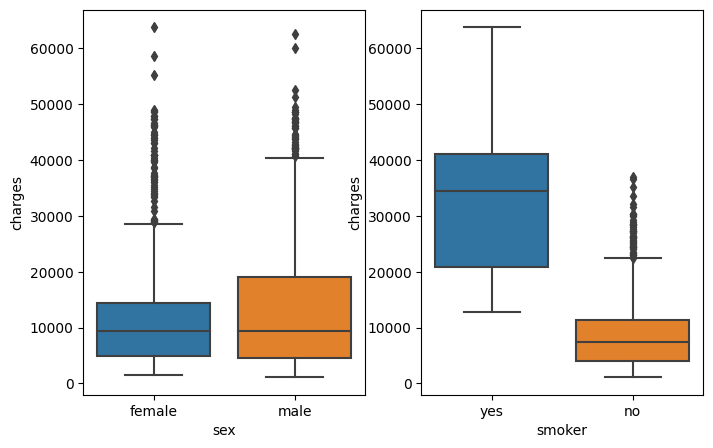

In [17]:
## plot smoker with charges and sex with charges

fig,(ax1,ax2)=plt.subplots(ncols=2)

sns.boxplot(x='sex',y='charges',data=df,ax=ax1)
sns.boxplot(x='smoker',y='charges',data=df,ax=ax2)

##people who smoke pay high insurance charges

In [18]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

<Axes: xlabel='children', ylabel='charges'>

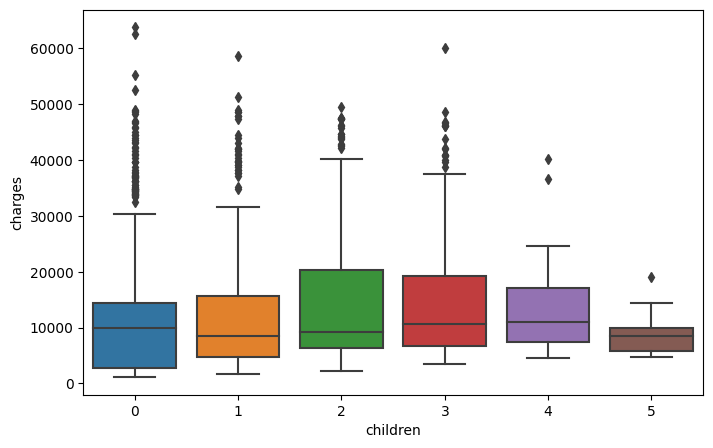

In [19]:
sns.boxplot(x='children',y='charges',data=df)

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Feature Engineering

In [21]:
categorical_columns=['sex','children','smoker','region']

#one hot encoding
df_encoded=pd.get_dummies(data=df,prefix='OHE',prefix_sep='_',columns=categorical_columns,drop_first=True,dtype='int8')

#### Data Transformation

In [22]:
df_encoded['charges']=np.log10(df_encoded['charges'])
df_encoded.head()

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,4.227499,0,0,0,0,0,0,1,0,0,1
1,18,33.770,3.236928,1,1,0,0,0,0,0,0,1,0
2,28,33.000,3.648308,1,0,0,1,0,0,0,0,1,0
3,33,22.705,4.342116,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3.587358,1,0,0,0,0,0,0,1,0,0


In [23]:
np.random.seed(20)
np.random.randn(2,1)

array([[0.88389311],
       [0.19586502]])

#### separating the dataset into features and label

In [24]:
X=df_encoded.drop(['charges'],axis=1)#input features

y=df_encoded['charges']#output variable


In [25]:
#splitting datasets into training sets and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23)

In [26]:
# Trainning the model using training dataset
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)


LinearRegression()

In [27]:
#parameters of the trained model
lin_reg.coef_

array([ 0.01439002,  0.00587029, -0.02943099,  0.06490821,  0.11852708,
        0.10600906,  0.22728308,  0.20239429,  0.67336524, -0.02425312,
       -0.06365815, -0.05798184])

In [28]:
lin_reg.intercept_

3.0657592155426676

In [29]:
#Predicting the target variable using linear regression model on test dataset
y_pred=lin_reg.predict(X_test)

In [30]:
y_pred.shape

(402,)

In [31]:
# calculating the mean square error
mean_squared_error(y_pred,y_test)

0.03532625850724222

In [32]:
#Computing R-square score
lin_reg.score(X_test,y_test)

0.7795687545055319

'''

This indicates that approximately 77.96% of the variance in the target variable can be explained by the linear regression model.
'''